In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [14]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [155]:
restaurant = pd.read_csv('./data/data_set/맛집 데이터 3.5 이상.csv')
restaurant.drop('Unnamed: 0', axis = 1, inplace = True)
restaurant

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000


In [156]:
population = pd.read_csv('./data/data_set/사업체종사자수(2011-2019).csv')
population = population[['구', '2019']]
population['구']=population['구'].str.replace(' ','')
population.rename(columns = {'2019':'사업체종사자수'}, inplace = True)
population

,구,사업체종사자수
0,종로구,260446
1,중구,392568
2,용산구,135240
3,성동구,178243
4,광진구,126305
5,동대문구,138400
6,중랑구,103345
7,성북구,111005
8,강북구,73904
9,도봉구,72939


In [157]:
df = pd.DataFrame(restaurant.구.value_counts())
df.rename(columns = {'구':'맛집수'}, inplace = True)
df['구'] = df.index
df.reset_index(inplace = True, drop=True)
df['구']=df['구'].str.replace(' ','')
df = df[['구', '맛집수']]
df

,구,맛집수
0,강남구,81
1,마포구,73
2,용산구,71
3,종로구,66
4,서초구,65
5,송파구,50
6,성동구,49
7,중구,46
8,서대문구,45
9,영등포구,38


In [158]:
for i in range(0, 24):
    for j in range(0, 24):
        if population.loc[i, '구'] == df.loc[j, '구']:
            population.loc[i, '맛집수'] = df.loc[j, '맛집수']

In [159]:
population.loc[17, '맛집수'] = 1
population.loc[24, '맛집수'] = 9
population['맛집수'] = population['맛집수'].astype(int)

In [160]:
population

,구,사업체종사자수,맛집수
0,종로구,260446,66
1,중구,392568,46
2,용산구,135240,71
3,성동구,178243,49
4,광진구,126305,22
5,동대문구,138400,18
6,중랑구,103345,3
7,성북구,111005,25
8,강북구,73904,5
9,도봉구,72939,10


In [161]:
population.to_csv('./data/data_set/구별 사업체종사자수와 맛집수.csv')

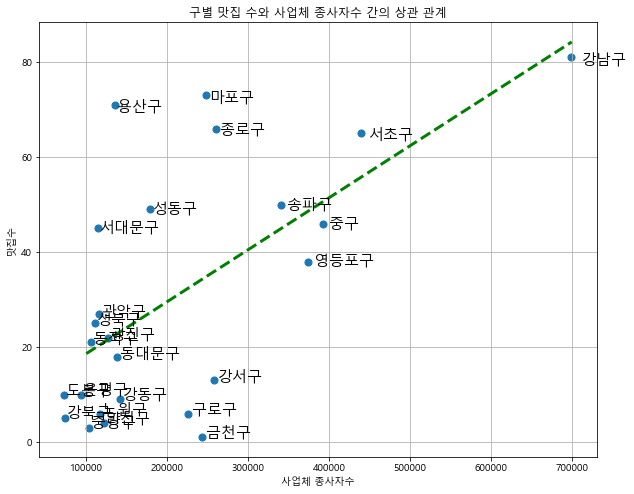

In [162]:
fp1 = np.polyfit(population['사업체종사자수'], population['맛집수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(10,8))
plt.scatter(population['사업체종사자수'], population['맛집수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(population['사업체종사자수'][n]*1.02, population['맛집수'][n]*0.98, 
             population.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 사업체 종사자수 간의 상관 관계")   
plt.xlabel('사업체 종사자수')
plt.ylabel('맛집수')
plt.grid()
plt.show()

In [163]:
company = pd.read_csv('./data/data_set/사업체수(2011-2019).csv')
company = company[['구', '2019']]
company.rename(columns = {'2019':'사업체수'}, inplace = True)
company

,구,사업체수
0,종로구,39679
1,중구,60127
2,용산구,20254
3,성동구,28343
4,광진구,24445
5,동대문구,31324
6,중랑구,28228
7,성북구,23617
8,강북구,19014
9,도봉구,18628


In [164]:
company['맛집수'] = population['맛집수']
company['맛집수'] = company['맛집수'].astype(int)
company

,구,사업체수,맛집수
0,종로구,39679,66
1,중구,60127,46
2,용산구,20254,71
3,성동구,28343,49
4,광진구,24445,22
5,동대문구,31324,18
6,중랑구,28228,3
7,성북구,23617,25
8,강북구,19014,5
9,도봉구,18628,10


In [165]:
company.to_csv('./data/data_set/구별 사업체수와 맛집수.csv')

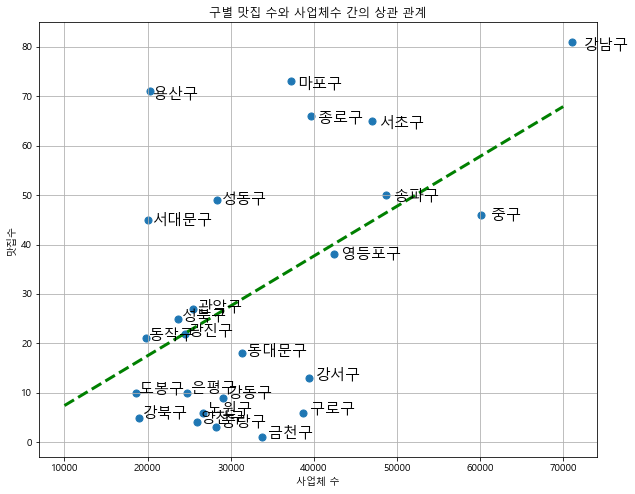

In [166]:
fp1 = np.polyfit(company['사업체수'], company['맛집수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(10000, 70000, 10)

plt.figure(figsize=(10,8))
plt.scatter(company['사업체수'], company['맛집수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(company['사업체수'][n]*1.02, company['맛집수'][n]*0.98, 
             company.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 사업체수 간의 상관 관계")   
plt.xlabel('사업체 수')
plt.ylabel('맛집수')
plt.grid()
plt.show()